In [4]:
from data_loader import load_samples, random_samples_plot

In [5]:
validation_samples = load_samples('datasets/fer2013_valid.samples')

Loading samples from datasets/fer2013_valid.samples


100%|██████████| 3589/3589 [00:00<00:00, 11145.92it/s]


100%|██████████| 128/128 [00:00<00:00, 673.68it/s]


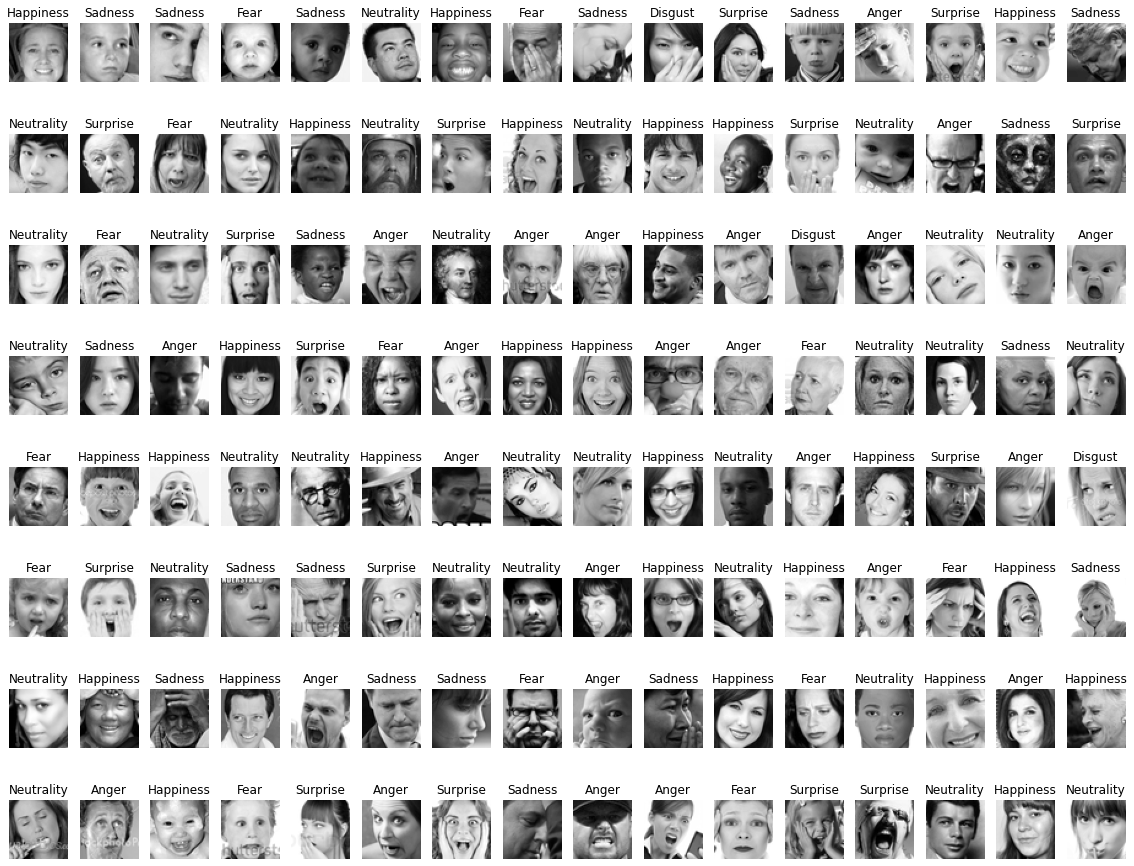

In [6]:
random_samples_plot(*validation_samples)